## Electric Vehicle Charging Patterns Notebook Experiment 

In [247]:
## load the basic required liberary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

## ignoring warnings 
import warnings
warnings.filterwarnings("ignore")

In [248]:
## Let's load the dataset 
df=pd.read_csv("dataset/ev_charging_patterns.csv")

In [249]:
## let's check shape of the data and top 10 records
print(df.shape)
df.head(10) #--> this will give us the top 10 records avaialable 

(1320, 20)


,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.000000,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.000000,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.000000,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.000000,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.000000,Level 1,Long-Distance Traveler
5,User_6,Nissan Leaf,50.000000,Station_335,San Francisco,2024-01-01 05:00:00,2024-01-01 07:10:00,43.181137,1.167640,14.334523,36.900341,Evening,Saturday,75.217748,71.982288,143.680046,-5.274218,0.000000,DC Fast Charger,Long-Distance Traveler
6,User_7,Chevy Bolt,85.000000,Station_162,Houston,2024-01-01 06:00:00,2024-01-01 07:53:00,36.862140,3.539619,26.185188,22.214225,Evening,Friday,60.751781,70.796097,81.338009,27.551335,4.000000,Level 2,Commuter
7,User_8,Chevy Bolt,75.000000,Station_302,Los Angeles,2024-01-01 07:00:00,2024-01-01 10:42:00,51.467617,2.655396,26.702908,9.796821,Afternoon,Monday,56.201703,63.786815,116.543166,-4.417460,0.000000,Level 2,Long-Distance Traveler
8,User_9,Chevy Bolt,62.000000,Station_493,Los Angeles,2024-01-01 08:00:00,2024-01-01 09:21:00,43.592372,1.724204,14.294923,32.465005,Evening,Wednesday,33.466200,92.961421,208.259742,22.516706,4.000000,Level 1,Commuter
9,User_10,Hyundai Kona,50.000000,Station_452,Chicago,2024-01-01 09:00:00,2024-01-01 12:44:00,78.868607,2.026875,11.761000,21.312302,Morning,Wednesday,27.399455,70.053381,54.006309,27.512019,2.830381,DC Fast Charger,Commuter


### About Dataset

This dataset provides a comprehensive analysis of electric vehicle (EV) charging patterns and user behavior. It contains 1,320 samples of charging session data, including metrics such as energy consumption, charging duration, and vehicle details. Each entry captures various aspects of EV usage, allowing for insightful analysis and predictive modeling.

#### Key Featues

1. User ID: Unique identifier for each user.
2. Vehicle Model: Model of the electric vehicle being charged (e.g., Tesla Model 3, Nissan Leaf).
3. Battery Capacity (kWh): Total battery capacity of the vehicle in kilowatt-hours.
4. Charging Station ID: Unique identifier for the charging station used.
5. Charging Station Location: Geographic location of the charging station (e.g., New York, Los Angeles).
6. Charging Start Time: Timestamp indicating when the charging session began.
7. Charging End Time: Timestamp indicating when the charging session ended.
8. Energy Consumed (kWh): Total energy consumed during the charging session, measured in kilowatt-hours.
9. Charging Duration (hours):Total time taken to charge the vehicle, measured in hours.
10. Charging Rate (kW): Average power delivery rate during the charging session, measured in kilowatts.
11. Charging Cost (USD): Total cost incurred for the charging session, measured in US dollars.
12. Time of Day: Time segment when the charging occurred (e.g., Morning, Afternoon).
13. Day of Week: Day of the week when the charging occurred (e.g., Monday, Tuesday).
14. State of Charge (Start %): Battery charge percentage at the start of the charging session.
15. State of Charge (End %): Battery charge percentage at the end of the charging session.
16. Distance Driven (since last charge) (km): Distance traveled since the last charging session, measured in kilometers.
17. Temperature (°C): Ambient temperature during the charging session, measured in degrees Celsius.
18. Vehicle Age (years): Age of the electric vehicle, measured in years.
19. Charger Type: Type of charger used (e.g., Level 1, Level 2, DC Fast Charger).
20. User Type: Classification of user based on driving habits (e.g., Commuter, Long-Distance Traveler).
 

#### Basic Statistics

1. Checking the percentage of missing values
2. Checking the datatype of the data
3. Gaining some informations for the data
4. Understanding the mean, median,mode, SD, min, & max values in the data for neumerical data
5. Renaming the columns 


In [250]:
percentage_of_missing_values=df.isnull().sum()/len(df) * 100
percentage_of_missing_values

User ID                                     0.0
Vehicle Model                               0.0
Battery Capacity (kWh)                      0.0
Charging Station ID                         0.0
Charging Station Location                   0.0
Charging Start Time                         0.0
Charging End Time                           0.0
Energy Consumed (kWh)                       5.0
Charging Duration (hours)                   0.0
Charging Rate (kW)                          5.0
Charging Cost (USD)                         0.0
Time of Day                                 0.0
Day of Week                                 0.0
State of Charge (Start %)                   0.0
State of Charge (End %)                     0.0
Distance Driven (since last charge) (km)    5.0
Temperature (°C)                            0.0
Vehicle Age (years)                         0.0
Charger Type                                0.0
User Type                                   0.0
dtype: float64

From the above I can see that there are 3 columns with the missing values 

Column names:
* Energy Consumed (kWh)
* Charging Rate (kW)
* Distance Driven (since last charge) (km)



In [251]:
df[df["Energy Consumed (kWh)"].isnull()]

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
44,User_45,Nissan Leaf,75.000000,Station_44,Los Angeles,2024-01-02 20:00:00,2024-01-02 22:29:00,NaN,3.296057,5.114613,30.037969,Morning,Wednesday,15.220939,132.952011,49.384266,32.014577,3.680053,Level 2,Long-Distance Traveler
48,User_49,Nissan Leaf,85.000000,Station_463,Los Angeles,2024-01-03 00:00:00,2024-01-03 01:57:00,NaN,1.743435,14.149666,13.112874,Night,Monday,77.809423,87.948114,212.940342,-4.446671,1.000000,Level 1,Casual Driver
75,User_76,Nissan Leaf,50.000000,Station_97,Los Angeles,2024-01-04 03:00:00,2024-01-04 05:03:00,NaN,3.520690,9.569245,24.790723,Night,Saturday,51.281403,93.198463,171.896153,-5.275728,4.000000,Level 1,Commuter
95,User_96,Chevy Bolt,24.599922,Station_10,Chicago,2024-01-04 23:00:00,2024-01-05 00:43:00,NaN,1.382498,32.436549,38.058022,Night,Tuesday,48.327354,85.067422,NaN,23.398468,5.000000,Level 1,Casual Driver
109,User_110,Chevy Bolt,85.000000,Station_495,Los Angeles,2024-01-05 13:00:00,2024-01-05 15:43:00,NaN,3.292577,49.878709,13.283976,Night,Sunday,59.849187,56.294162,137.137257,0.034127,5.000000,Level 1,Long-Distance Traveler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,User_1237,Tesla Model 3,62.000000,Station_231,Houston,2024-02-21 12:00:00,2024-02-21 14:50:00,NaN,1.281603,36.601306,29.781482,Night,Wednesday,76.960229,83.756621,11.769409,12.235645,1.000000,Level 1,Commuter
1266,User_1267,Chevy Bolt,75.000000,Station_473,New York,2024-02-22 18:00:00,2024-02-22 20:40:00,NaN,1.232835,43.980225,22.560838,Night,Saturday,76.703067,87.030390,286.323365,15.612703,3.224935,DC Fast Charger,Long-Distance Traveler
1270,User_1271,Tesla Model 3,75.000000,Station_302,Houston,2024-02-22 22:00:00,2024-02-23 01:06:00,NaN,0.548378,37.246496,15.367365,Evening,Monday,19.890941,62.232234,49.122660,-2.462734,4.000000,Level 2,Commuter
1271,User_1272,Nissan Leaf,75.000000,Station_334,New York,2024-02-22 23:00:00,2024-02-23 02:27:00,NaN,2.337807,36.932242,25.857018,Morning,Thursday,74.553612,83.232036,56.902262,37.492518,7.000000,Level 1,Long-Distance Traveler


In [252]:
df[df["Charging Rate (kW)"].isnull()]

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
21,User_22,Hyundai Kona,62.000000,Station_485,New York,2024-01-01 21:00:00,2024-01-01 22:55:00,59.135032,2.931761,NaN,34.853234,Evening,Sunday,71.530312,75.974352,219.626357,-2.755069,5.0,Level 1,Commuter
65,User_66,BMW i3,62.000000,Station_208,Houston,2024-01-03 17:00:00,2024-01-03 18:46:00,59.254602,1.279621,NaN,12.220438,Night,Thursday,77.036974,91.829275,167.297573,35.271451,7.0,Level 2,Long-Distance Traveler
68,User_69,BMW i3,75.000000,Station_154,Los Angeles,2024-01-03 20:00:00,2024-01-03 22:37:00,16.414017,1.702975,NaN,21.667787,Morning,Sunday,36.950284,77.136165,188.471490,18.538711,7.0,Level 1,Casual Driver
82,User_83,Hyundai Kona,85.000000,Station_32,Chicago,2024-01-04 10:00:00,2024-01-04 13:20:00,41.607834,0.807069,NaN,29.532933,Afternoon,Tuesday,54.997649,97.261616,94.645250,17.737388,3.0,Level 1,Commuter
99,User_100,Tesla Model 3,100.000000,Station_158,New York,2024-01-05 03:00:00,2024-01-05 05:09:00,50.903482,3.621317,NaN,28.338887,Night,Sunday,54.449204,60.557819,10.441929,30.044883,7.0,DC Fast Charger,Commuter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,User_1226,BMW i3,75.000000,Station_67,San Francisco,2024-02-21 01:00:00,2024-02-21 02:05:00,11.139613,0.767175,NaN,37.339629,Morning,Sunday,75.437948,98.855157,246.705820,35.776100,5.0,Level 1,Casual Driver
1253,User_1254,BMW i3,62.000000,Station_152,New York,2024-02-22 05:00:00,2024-02-22 06:41:00,37.515884,0.797133,NaN,9.589103,Evening,Tuesday,26.135804,69.594858,238.750534,-2.560783,7.0,Level 2,Casual Driver
1261,User_1262,Tesla Model 3,75.000000,Station_310,Chicago,2024-02-22 13:00:00,2024-02-22 14:58:00,25.527547,0.434890,NaN,25.021182,Afternoon,Sunday,20.065397,80.320747,265.238349,18.996540,4.0,Level 1,Commuter
1277,User_1278,Hyundai Kona,75.000000,Station_232,Los Angeles,2024-02-23 05:00:00,2024-02-23 07:19:00,27.997205,1.768621,NaN,25.537205,Evening,Wednesday,59.660627,95.054221,212.708285,-6.855073,0.0,DC Fast Charger,Commuter


In [253]:
df[df["Distance Driven (since last charge) (km)"].isnull()]

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
28,User_29,BMW i3,75.000000,Station_129,Los Angeles,2024-01-02 04:00:00,2024-01-02 04:35:00,31.684485,2.439678,48.648723,25.617104,Afternoon,Friday,34.727639,54.402050,NaN,20.378562,3.0,Level 2,Casual Driver
30,User_31,Chevy Bolt,100.000000,Station_239,New York,2024-01-02 06:00:00,2024-01-02 09:54:00,19.473801,1.435533,7.043936,36.945273,Afternoon,Wednesday,31.320787,78.056653,NaN,8.352906,2.0,DC Fast Charger,Casual Driver
95,User_96,Chevy Bolt,24.599922,Station_10,Chicago,2024-01-04 23:00:00,2024-01-05 00:43:00,NaN,1.382498,32.436549,38.058022,Night,Tuesday,48.327354,85.067422,NaN,23.398468,5.0,Level 1,Casual Driver
97,User_98,Nissan Leaf,85.000000,Station_90,Los Angeles,2024-01-05 01:00:00,2024-01-05 03:33:00,31.046575,0.690282,28.004859,6.254545,Night,Saturday,47.157861,66.193488,NaN,15.627396,7.0,DC Fast Charger,Casual Driver
121,User_122,BMW i3,75.000000,Station_284,Los Angeles,2024-01-06 01:00:00,2024-01-06 03:11:00,39.644390,1.925742,13.798289,6.965266,Afternoon,Wednesday,20.417449,57.501988,NaN,22.572012,6.0,Level 2,Casual Driver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,User_1153,Chevy Bolt,85.000000,Station_448,Los Angeles,2024-02-18 00:00:00,2024-02-18 02:22:00,NaN,3.339943,39.404952,11.083052,Afternoon,Sunday,34.071694,98.866689,NaN,32.311049,5.0,Level 2,Commuter
1206,User_1207,BMW i3,100.000000,Station_45,Los Angeles,2024-02-20 06:00:00,2024-02-20 08:48:00,55.691892,2.870814,3.856230,5.433701,Afternoon,Sunday,25.912943,91.244256,NaN,11.353635,0.0,Level 2,Casual Driver
1281,User_1282,Nissan Leaf,50.000000,Station_489,Chicago,2024-02-23 09:00:00,2024-02-23 10:18:00,6.448880,2.246434,11.019392,5.388237,Morning,Saturday,26.982929,98.397370,NaN,12.193185,7.0,DC Fast Charger,Long-Distance Traveler
1310,User_1311,Tesla Model 3,62.000000,Station_268,New York,2024-02-24 14:00:00,2024-02-24 17:50:00,66.979908,0.775663,13.787151,38.833010,Afternoon,Saturday,64.126073,94.364933,NaN,36.432088,1.0,Level 2,Casual Driver


Based on my observation records for missing values are different with respect to each columns. It's important to handle the missing values in advance. 

In [254]:
## Dealing With Missing Values: For all this missing values I am replacing with the median()
energy_consumed_median=df['Energy Consumed (kWh)'].median()
print(f"Median for Energy Consumed (kWh) is: {energy_consumed_median}")
charging_rate_median=df['Charging Rate (kW)'].median()
print(f"Median for Charging Rate (KW) is: {charging_rate_median}")
distance_driven_median=df['Distance Driven (since last charge) (km)'].median()
print(f"Median for the Distance Driven (since last charge) is: {distance_driven_median}")

## Replace all the missing values with the median of those
df['Energy Consumed (kWh)'].fillna(energy_consumed_median,inplace=True)
df['Charging Rate (kW)'].fillna(charging_rate_median,inplace=True)
df['Distance Driven (since last charge) (km)'].fillna(distance_driven_median,inplace=True)

## Once we have done the replacement of all the missing values, now lets check the missing values again
df.isnull().sum()

Median for Energy Consumed (kWh) is: 42.69140537961698
Median for Charging Rate (KW) is: 25.603799331857445
Median for the Distance Driven (since last charge) is: 152.25986699080715


User ID                                     0
Vehicle Model                               0
Battery Capacity (kWh)                      0
Charging Station ID                         0
Charging Station Location                   0
Charging Start Time                         0
Charging End Time                           0
Energy Consumed (kWh)                       0
Charging Duration (hours)                   0
Charging Rate (kW)                          0
Charging Cost (USD)                         0
Time of Day                                 0
Day of Week                                 0
State of Charge (Start %)                   0
State of Charge (End %)                     0
Distance Driven (since last charge) (km)    0
Temperature (°C)                            0
Vehicle Age (years)                         0
Charger Type                                0
User Type                                   0
dtype: int64

From the above observation there are no missing values for the dataset

In [255]:
df.head(2)

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver


In [256]:
## Checking the datatype of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1320 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1320 non-null   float64
 10  Charging Cost (USD)                 

In [257]:
## let's check the unique values in the whole dataset
df.nunique()

User ID                                     1320
Vehicle Model                                  5
Battery Capacity (kWh)                       147
Charging Station ID                          462
Charging Station Location                      5
Charging Start Time                         1320
Charging End Time                           1309
Energy Consumed (kWh)                       1255
Charging Duration (hours)                   1320
Charging Rate (kW)                          1255
Charging Cost (USD)                         1320
Time of Day                                    4
Day of Week                                    7
State of Charge (Start %)                   1320
State of Charge (End %)                     1320
Distance Driven (since last charge) (km)    1255
Temperature (°C)                            1320
Vehicle Age (years)                          114
Charger Type                                   3
User Type                                      3
dtype: int64

In [258]:
## Let me drop the User ID column first as not in use for me 
df.drop("User ID",axis=1,inplace=True)

In [259]:
# getting numerical and categorical data columns 
numerical_features=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=="O"]
print("We have {} numerical feature: {}".format(len(numerical_features),numerical_features))
print('\n')
print("We have {} categorical feature: {}".format(len(categorical_features),categorical_features))

We have 10 numerical feature: ['Battery Capacity (kWh)', 'Energy Consumed (kWh)', 'Charging Duration (hours)', 'Charging Rate (kW)', 'Charging Cost (USD)', 'State of Charge (Start %)', 'State of Charge (End %)', 'Distance Driven (since last charge) (km)', 'Temperature (°C)', 'Vehicle Age (years)']


We have 9 categorical feature: ['Vehicle Model', 'Charging Station ID', 'Charging Station Location', 'Charging Start Time', 'Charging End Time', 'Time of Day', 'Day of Week', 'Charger Type', 'User Type']


In [260]:
## Let's check the unique categories for each categorical features 
cat_feture_name=[]
count_of_unique = []
for column in categorical_features:
    cat_feture_name.append(column)
    unique=df[column].nunique()
    count_of_unique.append(unique)
    
dataset=pd.DataFrame(
    {'feature_name':cat_feture_name,
    "unique_feature_count":count_of_unique}
)  
dataset.set_index('feature_name')

,unique_feature_count
feature_name,
Vehicle Model,5
Charging Station ID,462
Charging Station Location,5
Charging Start Time,1320
Charging End Time,1309
Time of Day,4
Day of Week,7
Charger Type,3
User Type,3


From the above observation I can see that `Charging Station ID`, `Charging Start Time`, and `Charging End Time` have lot's of categorical values and I am dropping them. 

In [261]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=="O"]
cat_feture_name=[]
count_of_unique = []
for column in categorical_features:
    cat_feture_name.append(column)
    unique=df[column].nunique()
    count_of_unique.append(unique)
    
dataset=pd.DataFrame(
    {'feature_name':cat_feture_name,
    "unique_feature_count":count_of_unique}
)
dataset.set_index("feature_name")

,unique_feature_count
feature_name,
Vehicle Model,5
Charging Station ID,462
Charging Station Location,5
Charging Start Time,1320
Charging End Time,1309
Time of Day,4
Day of Week,7
Charger Type,3
User Type,3



#### Univariate Analysis


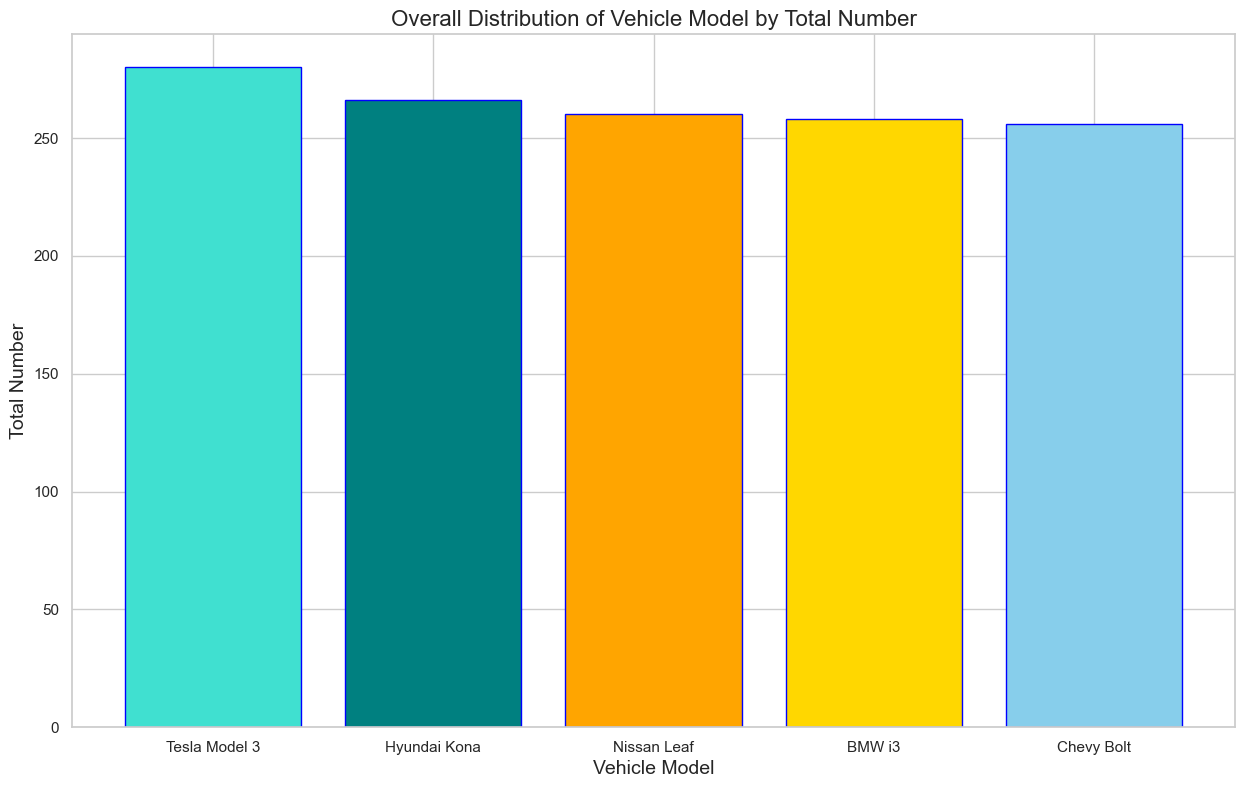

In [262]:
vehicle_model_count=df['Vehicle Model'].value_counts()
plt.figure(figsize=(15,9))
plt.bar(vehicle_model_count.index,vehicle_model_count.values, color=['turquoise', 'teal', 'orange', 'gold', 'skyblue'],edgecolor='blue')
plt.xticks(vehicle_model_count.index, rotation=0)
plt.xlabel("Vehicle Model", fontsize=14)
plt.ylabel("Total Number", fontsize=14)
plt.title("Overall Distribution of Vehicle Model by Total Number", fontsize=16)
plt.show()

From the above obeservation I can see that on an average every model has 250+ charing stations.

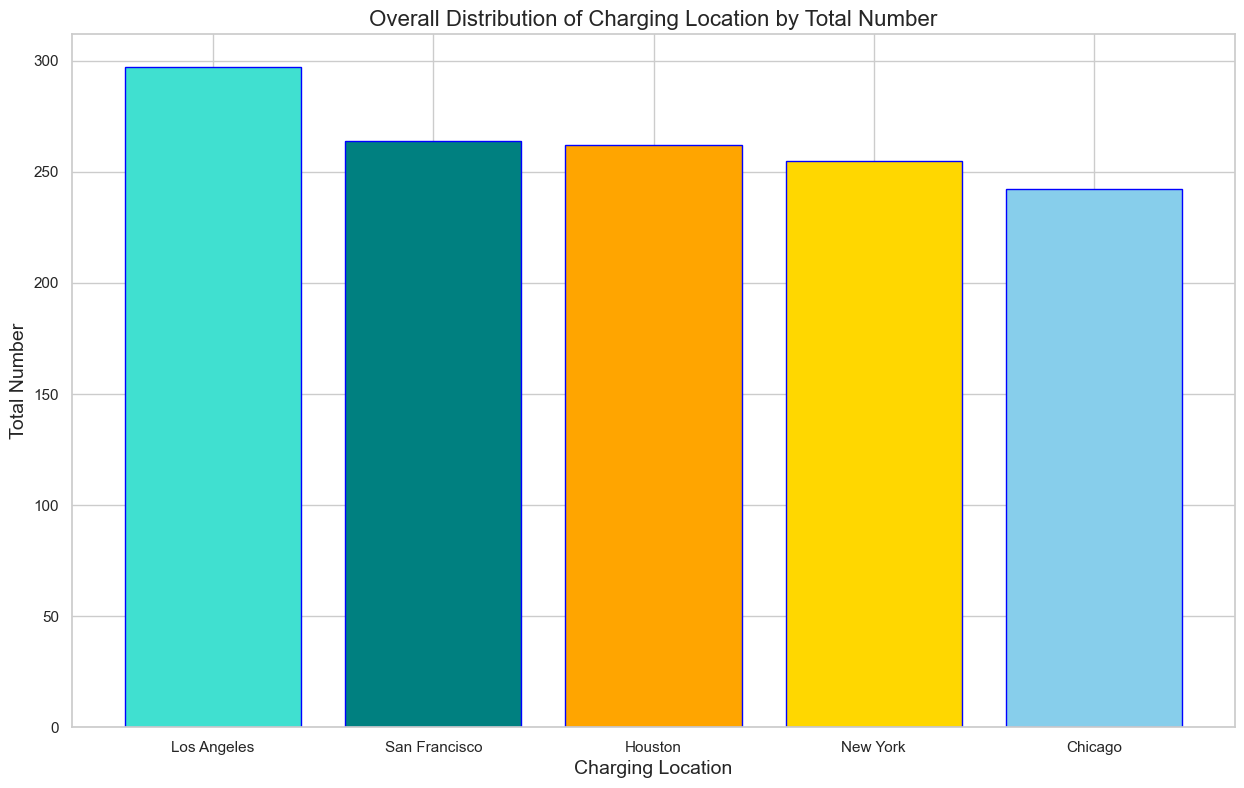

In [263]:
count_of_charging_point_per_city=df['Charging Station Location'].value_counts()
plt.figure(figsize=(15,9))
plt.bar(count_of_charging_point_per_city.index,count_of_charging_point_per_city.values,color=['turquoise', 'teal', 'orange', 'gold', 'skyblue'],edgecolor='blue')
plt.xticks(count_of_charging_point_per_city.index,rotation=0)
plt.xlabel("Charging Location", fontsize=14)
plt.ylabel("Total Number", fontsize=14)
plt.title("Overall Distribution of Charging Location by Total Number", fontsize=16)
plt.show()

In [264]:
vehicle_model_count,count_of_charging_point_per_city

(Vehicle Model
 Tesla Model 3    280
 Hyundai Kona     266
 Nissan Leaf      260
 BMW i3           258
 Chevy Bolt       256
 Name: count, dtype: int64,
 Charging Station Location
 Los Angeles      297
 San Francisco    264
 Houston          262
 New York         255
 Chicago          242
 Name: count, dtype: int64)

In [265]:
df.columns

Index(['Vehicle Model', 'Battery Capacity (kWh)', 'Charging Station ID',
       'Charging Station Location', 'Charging Start Time', 'Charging End Time',
       'Energy Consumed (kWh)', 'Charging Duration (hours)',
       'Charging Rate (kW)', 'Charging Cost (USD)', 'Time of Day',
       'Day of Week', 'State of Charge (Start %)', 'State of Charge (End %)',
       'Distance Driven (since last charge) (km)', 'Temperature (°C)',
       'Vehicle Age (years)', 'Charger Type', 'User Type'],
      dtype='object')

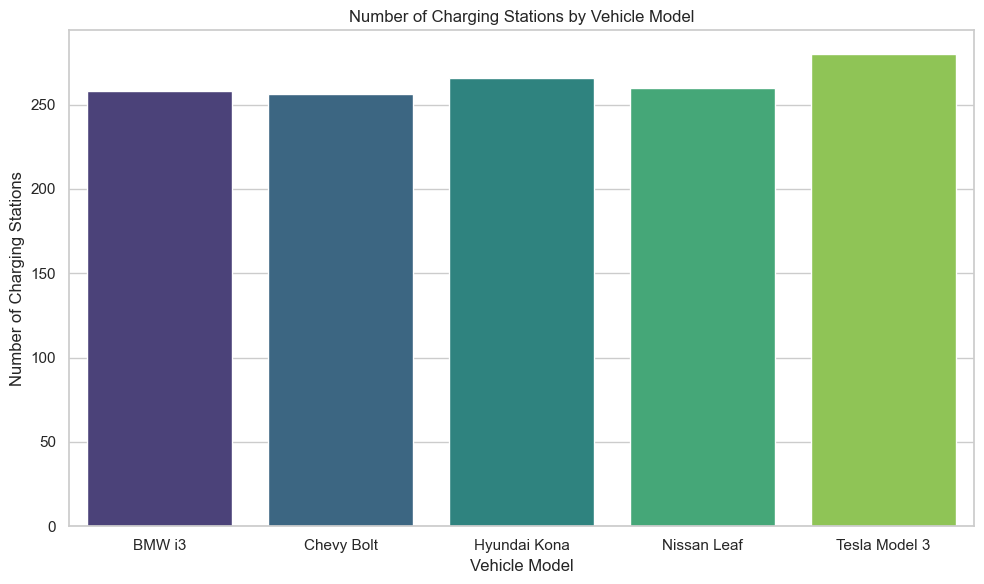

In [266]:
df_grouped = df.groupby('Vehicle Model',group_keys=True)['Charging Station Location'].count().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Vehicle Model', y='Charging Station Location', data=df_grouped, palette='viridis')
plt.xlabel('Vehicle Model')
plt.ylabel('Number of Charging Stations')
plt.title('Number of Charging Stations by Vehicle Model')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

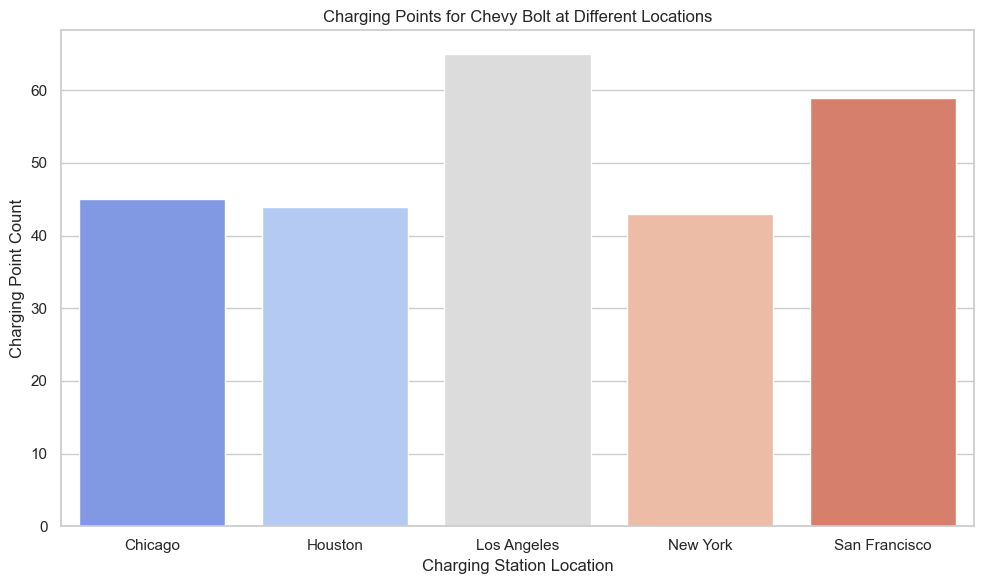

In [267]:
chevy_bolt_data = df[df['Vehicle Model'] == 'Chevy Bolt']
chevy_bolt_charging_counts = chevy_bolt_data.groupby('Charging Station Location')['Charging Station ID'].count().reset_index()
chevy_bolt_charging_counts.columns = ['Charging Station Location', 'Charging Point Count']
plt.figure(figsize=(10, 6))
sns.barplot(x='Charging Station Location', y='Charging Point Count', data=chevy_bolt_charging_counts, palette='coolwarm')
plt.xlabel('Charging Station Location')
plt.ylabel('Charging Point Count')
plt.title('Charging Points for Chevy Bolt at Different Locations')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Created an automated process to visualize the Vehicle model based on Charging Station and Charging point

Available Vehicle Models:
1. Chevy Bolt
2. Tesla Model 3
3. Hyundai Kona
4. Nissan Leaf
5. BMW i3


Please enter the name of the vehicle model you want to visualize:  Hyundai Kona


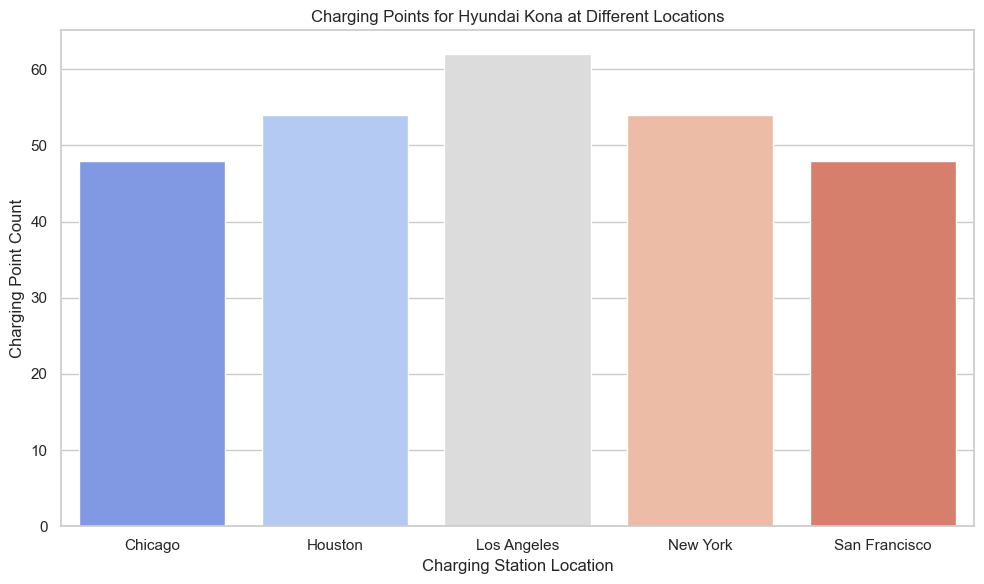

In [268]:
# Function to visualize charging points for a specific vehicle model
def visualize_charging_points(df, vehicle_model):

    model_data = df[df['Vehicle Model'] == vehicle_model]
    
    model_charging_counts = model_data.groupby('Charging Station Location')['Charging Station ID'].count().reset_index()
    model_charging_counts.columns = ['Charging Station Location', 'Charging Point Count']
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Charging Station Location', y='Charging Point Count', data=model_charging_counts, palette='coolwarm')
    plt.xlabel('Charging Station Location')
    plt.ylabel('Charging Point Count')
    plt.title(f'Charging Points for {vehicle_model} at Different Locations')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

#visualize_charging_points(df, 'Hyundai Kona')

print("Available Vehicle Models:")
print("1. Chevy Bolt")
print("2. Tesla Model 3")
print("3. Hyundai Kona")
print("4. Nissan Leaf")
print("5. BMW i3")

selected_model = input("Please enter the name of the vehicle model you want to visualize: ")
if selected_model in df['Vehicle Model'].unique():
    visualize_charging_points(df, selected_model)
else:
    print("Invalid vehicle model. Please ensure you entered it correctly.")

In [269]:
df['Time of Day'].value_counts()

Time of Day
Evening      362
Morning      336
Night        312
Afternoon    310
Name: count, dtype: int64

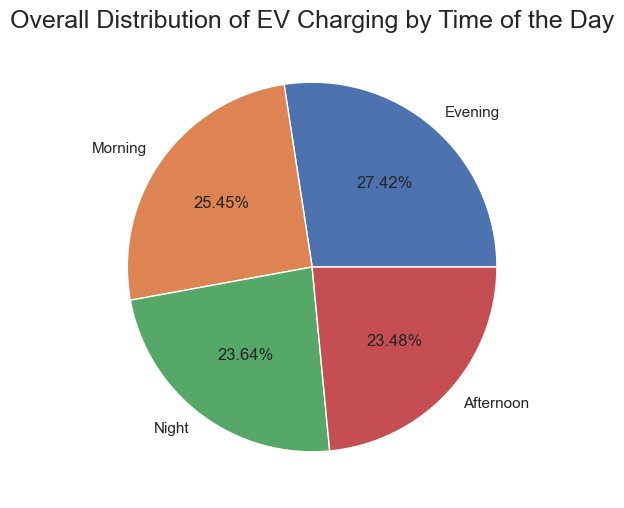

In [270]:
evening_counts = df[df['Time of Day']=='Evening']['Time of Day'].value_counts().values[0]
morning_counts = df[df['Time of Day']=='Morning']['Time of Day'].value_counts().values[0]
night_counts = df[df['Time of Day']=='Night']['Time of Day'].value_counts().values[0]
afternoon_counts = df[df['Time of Day']=='Afternoon']['Time of Day'].value_counts().values[0]

index_values = [evening_counts, morning_counts, night_counts, afternoon_counts]
index_labels=['Evening', 'Morning', 'Night', 'Afternoon']

plt.figure(figsize=(10,6))
plt.pie(index_values, labels =index_labels, autopct='%2.2f%%')
plt.title('Overall Distribution of EV Charging by Time of the Day', fontsize=18)

plt.show()

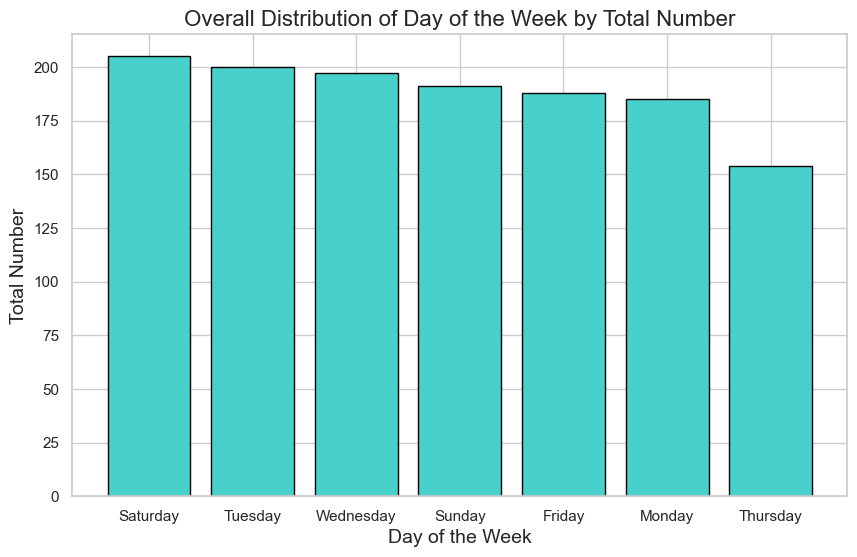

In [271]:
day_of_the_week_counts = df['Day of Week'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(day_of_the_week_counts.index, day_of_the_week_counts.values, color='mediumturquoise', edgecolor='black')

plt.xticks(day_of_the_week_counts.index, day_of_the_week_counts.index, rotation=0)

plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("Total Number", fontsize=14)
plt.title("Overall Distribution of Day of the Week by Total Number", fontsize=16)

plt.show()

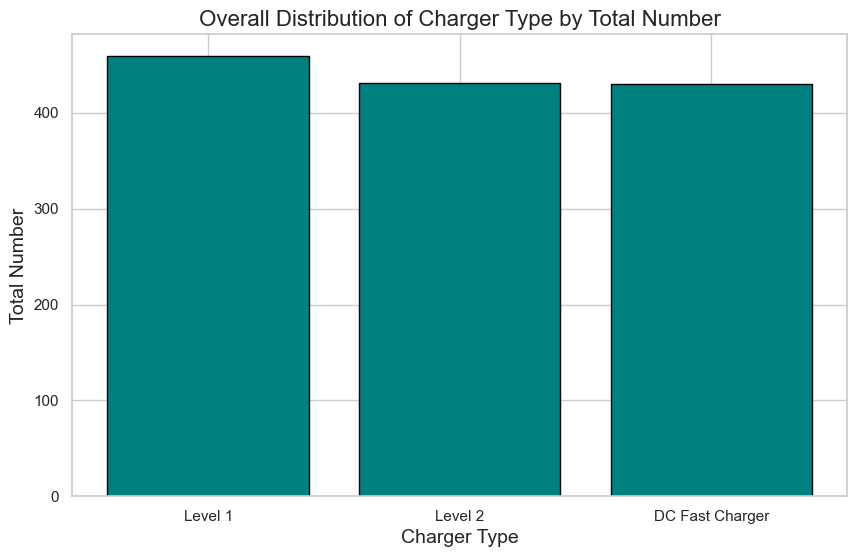

In [272]:
charger_type_counts = df['Charger Type'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(charger_type_counts.index, charger_type_counts.values, color='teal', edgecolor='black')

plt.xticks(charger_type_counts.index, charger_type_counts.index, rotation=0)

plt.xlabel("Charger Type", fontsize=14)
plt.ylabel("Total Number", fontsize=14)
plt.title("Overall Distribution of Charger Type by Total Number", fontsize=16)

plt.show()

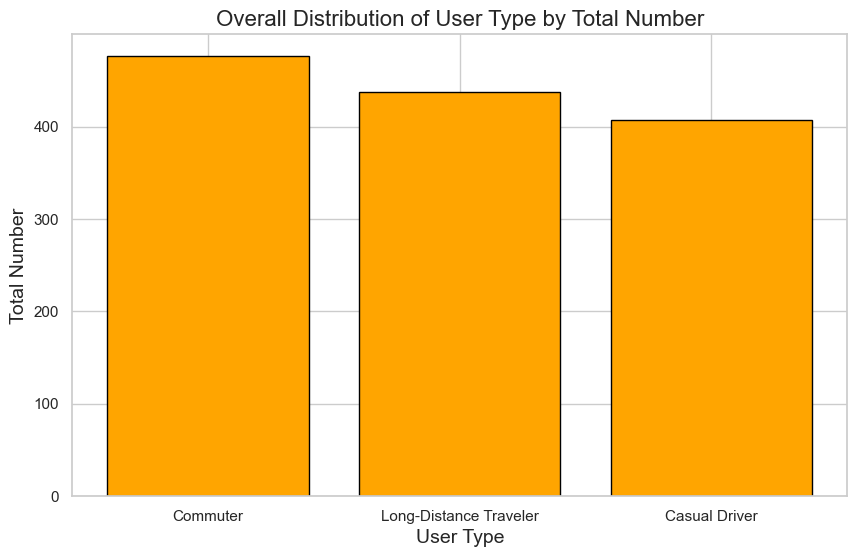

In [273]:
user_type_counts = df['User Type'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(user_type_counts.index, user_type_counts.values, color='orange', edgecolor='black')

plt.xticks(user_type_counts.index, user_type_counts.index, rotation=0)

plt.xlabel("User Type", fontsize=14)
plt.ylabel("Total Number", fontsize=14)
plt.title("Overall Distribution of User Type by Total Number", fontsize=16)

plt.show()

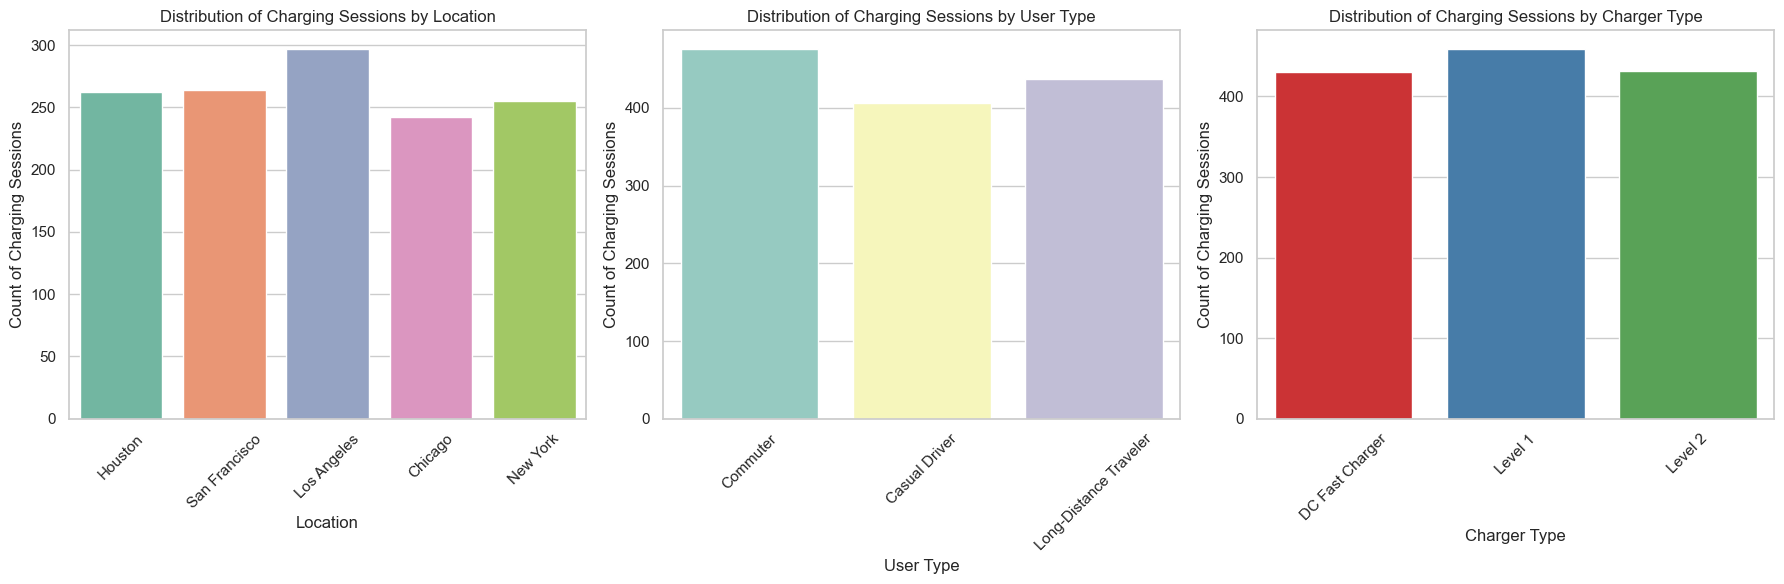

In [274]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(ax=axes[0], data=df, x='Charging Station Location', palette='Set2')
axes[0].set_title('Distribution of Charging Sessions by Location')
axes[0].set_xlabel('Location')
axes[0].set_ylabel('Count of Charging Sessions')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(ax=axes[1], data=df, x='User Type', palette='Set3')
axes[1].set_title('Distribution of Charging Sessions by User Type')
axes[1].set_xlabel('User Type')
axes[1].set_ylabel('Count of Charging Sessions')
axes[1].tick_params(axis='x', rotation=45)

sns.countplot(ax=axes[2], data=df, x='Charger Type', palette='Set1')
axes[2].set_title('Distribution of Charging Sessions by Charger Type')
axes[2].set_xlabel('Charger Type')
axes[2].set_ylabel('Count of Charging Sessions')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

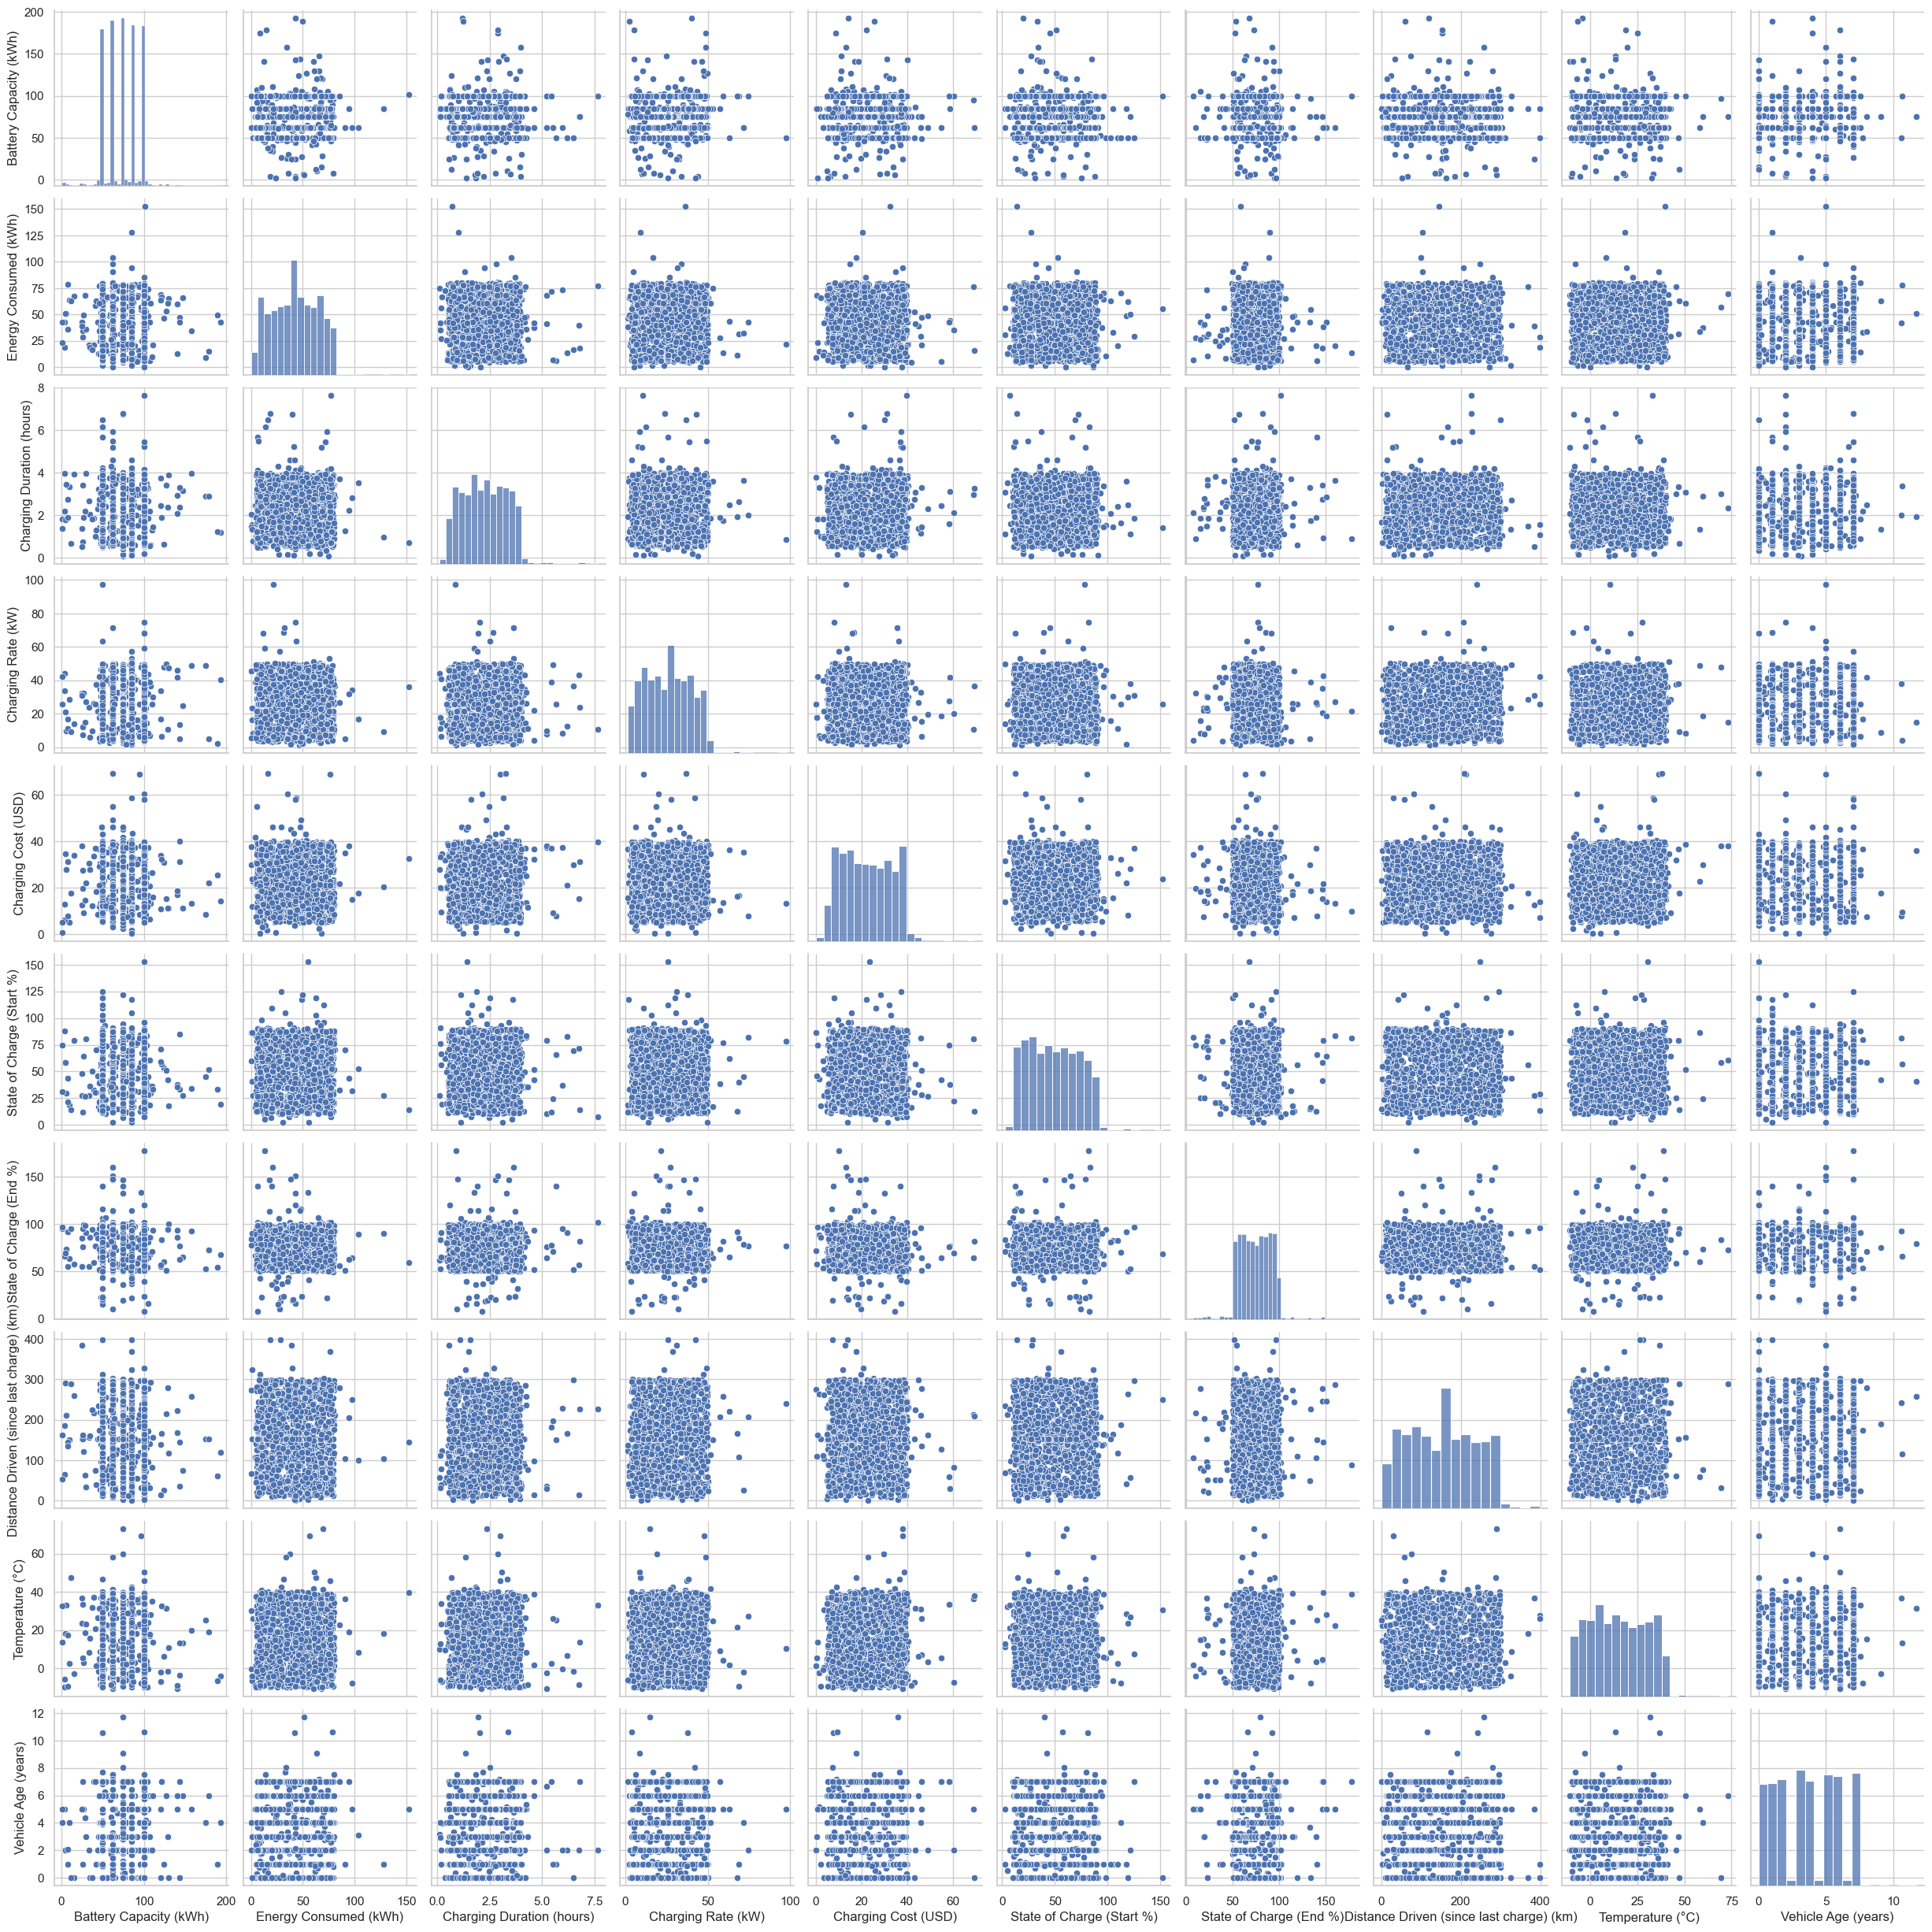

In [275]:
sns.pairplot(data=df[numerical_features])

In [302]:
df.to_csv("final_data.csv")